<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-matplotlib-and-seaborn,-and-load-the-Covid-totals-data" data-toc-modified-id="Import-matplotlib-and-seaborn,-and-load-the-Covid-totals-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import matplotlib and seaborn, and load the Covid totals data</a></span></li><li><span><a href="#Generate-a-correlation-matrix" data-toc-modified-id="Generate-a-correlation-matrix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate a correlation matrix</a></span></li><li><span><a href="#Show-scatter-plots-of-median-age-and-gross-domestic-product-(GDP)-per-capita-by-cases-per-million" data-toc-modified-id="Show-scatter-plots-of-median-age-and-gross-domestic-product-(GDP)-per-capita-by-cases-per-million-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Show scatter plots of median age and <em>gross domestic product (GDP)</em> per capita by cases per million</a></span></li><li><span><a href="#Generate-a-heat-map-of-the-correlation-matrix" data-toc-modified-id="Generate-a-heat-map-of-the-correlation-matrix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate a heat map of the correlation matrix</a></span></li></ul></div>

# Import matplotlib and seaborn, and load the Covid totals data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.width', 80)
# pd.set_option('display.max_columns', 7)
# pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
import watermark
%load_ext watermark

%watermark -n -i -iv

matplotlib: 3.3.2
watermark : 2.1.0
pandas    : 1.2.1
numpy     : 1.19.2
seaborn   : 0.11.1
json      : 2.0.9



In [5]:
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])

# Generate a correlation matrix

In [6]:
corr = covidtotals.corr()

In [8]:
corr[['total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']]

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
total_cases,1.00,0.93,0.23,0.26
total_deaths,0.93,1.00,0.20,0.41
total_cases_pm,0.23,0.20,1.00,0.49
total_deaths_pm,0.26,0.41,0.49,1.00
population,0.34,0.28,-0.04,-0.00
pop_density,-0.03,-0.03,0.08,0.02
median_age,0.12,0.17,0.22,0.38
gdp_per_capita,0.13,0.16,0.58,0.37
hosp_beds,-0.01,-0.01,0.02,0.09


# Show scatter plots of median age and *gross domestic product (GDP)* per capita by cases per million

D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


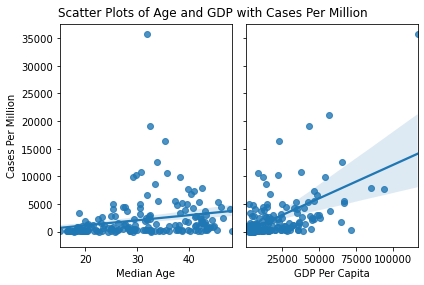

In [14]:
# fig, axes = plt.subplots(1,2, sharey=True, figsize=(8, 5))
fig, axes = plt.subplots(1, 2, sharey=True)
sns.regplot(covidtotals['median_age'],
            covidtotals['total_cases_pm'],
            ax=axes[0])
sns.regplot(covidtotals['gdp_per_capita'],
            covidtotals['total_cases_pm'],
            ax=axes[1])
axes[0].set_xlabel('Median Age')
axes[0].set_ylabel('Cases Per Million')
axes[1].set_xlabel('GDP Per Capita')
axes[1].set_ylabel('')
plt.suptitle('Scatter Plots of Age and GDP with Cases Per Million')
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

# Generate a heat map of the correlation matrix

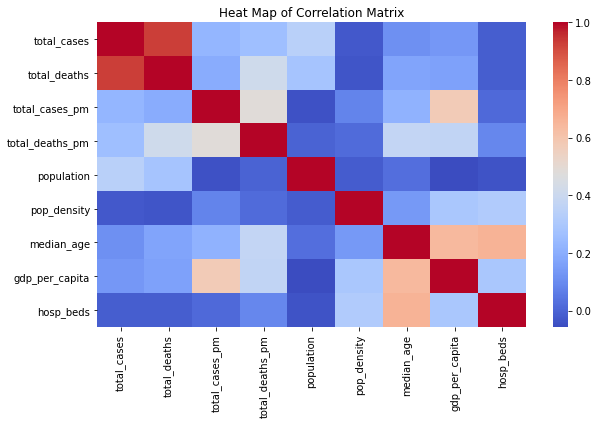

In [21]:
plt.figure(figsize=(9, 6))
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='viridis_r')
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm')
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()